In [1]:
# install python libraries
# in jupyter notebooks, use ! before pip command.

!pip install numpy -U

In [2]:
# import python libraries
''' 
NumPy is a fundamental library for scientific computing with Python. 
It provides support for arrays and matrices, along with mathematical functions to operate on these arrays. 
NumPy is widely used for numerical computations and data manipulation, particularly in tasks involving large datasets or mathematical operations.
'''
import numpy as np 

''' 
Pandas is a popular library for data manipulation and analysis. 
It provides data structures like DataFrame and Series, which are powerful tools for handling and organizing data. 
Pandas is frequently used for data cleaning, transformation, and exploration, making it an essential library for data science and analysis tasks
'''
import pandas as pd 

'''
Matplotlib is a versatile library for creating static, animated, or interactive visualizations in Python. 
The pyplot module within Matplotlib is commonly used for creating various types of plots, charts, and graphs. 
It's an excellent choice for data visualization and presentation of your analysis results.
'''
import matplotlib.pyplot as plt

'''
The %matplotlib inline command is a Jupyter Notebook-specific magic command. 
It ensures that the Matplotlib plots are displayed directly in the notebook rather than in separate windows.
'''
%matplotlib inline

'''
Seaborn is a data visualization library built on top of Matplotlib. 
It simplifies the creation of informative and attractive statistical graphics. 
Seaborn offers a high-level interface for drawing attractive and informative statistical graphics.
It's particularly useful for tasks like creating aesthetically pleasing statistical plots.
'''
import seaborn as sns

# PART 1: Data Cleaning

In [3]:
# import csv file
# creating dataframe by importing the csv file using pandas 'read_csv' function.
df = pd.read_csv('retail_sales_dataset.csv', encoding= 'unicode_escape')

In [7]:
# dataframe shape: give tuple of Rows x Columns count.
count_rows, count_columns = df.shape

# Printing with message
print(f"No. of Rows = {count_rows}")
print(f"No. of Columns = {count_columns}")


No. of Rows = 1000
No. of Columns = 9


In [8]:
# dataframe head: return data from first 5 rows.
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [60]:
# Assuming df is your DataFrame

# Create a new column and initialize with default values
df['Age_Group'] = ''

# Apply condition and update values in the new column
df.loc[df['Age'] <= 18, 'Age_Group'] = '0 - 18'
df.loc[(df['Age'] > 18) & (df['Age'] <= 30), 'Age_Group'] = '18 - 30'
df.loc[(df['Age'] > 30) & (df['Age'] <= 45), 'Age_Group'] = '30 - 45'
df.loc[(df['Age'] > 45) & (df['Age'] <= 60), 'Age_Group'] = '45 - 60'
df.loc[(df['Age'] > 60), 'Age_Group'] = '60+'

# Print the DataFrame to verify the changes
print(df.head())


   Transaction ID       Date  Gender  Age product_category  Quantity  \
0               1 2023-11-24    Male   34           Beauty         3   
1               2 2023-02-27  Female   26         Clothing         2   
2               3 2023-01-13    Male   50      Electronics         1   
3               4 2023-05-21    Male   37         Clothing         1   
4               5 2023-05-06    Male   30           Beauty         2   

   Price per Unit  Total Amount   New Column Age_Group  
0              50           150        Adult   30 - 45  
1             500          1000  Young Adult   18 - 30  
2              30            30  Middle Aged   45 - 60  
3             500           500        Adult   30 - 45  
4              50           100  Young Adult   18 - 30  


In [46]:
# dataframe tail: return data from last 5 rows.
df.tail()

,Transaction ID,Date,Gender,Age,product_category,Quantity,Price per Unit,Total Amount,New Column
995,996,2023-05-16,Male,62,Clothing,1,50,50,Elderly
996,997,2023-11-17,Male,52,Beauty,3,30,90,Senior
997,998,2023-10-29,Female,23,Beauty,4,25,100,Young Adult
998,999,2023-12-05,Female,36,Electronics,3,50,150,Adult
999,1000,2023-04-12,Male,47,Electronics,4,30,120,Middle Aged


In [10]:
# display data of in-between rows.
df.head(3).tail(5)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30


In [11]:
# dataframe info: show the schema of the table columns.
# helpful to show the null value count in some columns.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [13]:
#drop unrelated/blank columns
# 'axis = 1' means whole column.
# 'inplace = True' means changes takes place from here. otherwise same data will appear in next output.

df.drop(['Customer ID'], axis=1, inplace=True)

In [14]:
# pandas isnull: check presence of null values
# sum (): return count
pd.isnull(df).sum()

Transaction ID      0
Date                0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [15]:
# dataframe dropna: drop rows containing the null values
df.dropna(inplace=True)

In [20]:
# dataframe astype: change data type
df['Total Amount'] = df['Total Amount'].astype('int')    # using variable to assign changes in same entity.

df['Date'] = pd.to_datetime(df['Date'])  # Convert to datetime using pd.to_datetime()

In [21]:
# dataframe dtypes: check the data type of the columns
df.dtypes

# df['Amount'].dtypes        # check for single column

Transaction ID               int64
Date                datetime64[ns]
Gender                      object
Age                          int64
Product Category            object
Quantity                     int64
Price per Unit               int64
Total Amount                 int32
dtype: object

In [22]:
# dataframe columns: return the names of all columns
df.columns

Index(['Transaction ID', 'Date', 'Gender', 'Age', 'Product Category',
       'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

In [23]:
# dataframe rename: rename column. pass the dictionary of previous and new value.
df.rename(columns= {'Product Category':'product_category'}, inplace =  True)

In [24]:
# dataframe describe: returns statistical description of the data in the DataFrame (i.e. count, mean, std, etc)

df.describe()        # for a all the column

,Transaction ID,Date,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,2023-07-03 00:25:55.200000256,41.39200,2.514000,179.890000,456.000000
min,1.000000,2023-01-01 00:00:00,18.00000,1.000000,25.000000,25.000000
25%,250.750000,2023-04-08 00:00:00,29.00000,1.000000,30.000000,60.000000
50%,500.500000,2023-06-29 12:00:00,42.00000,3.000000,50.000000,135.000000
75%,750.250000,2023-10-04 00:00:00,53.00000,4.000000,300.000000,900.000000
max,1000.000000,2024-01-01 00:00:00,64.00000,4.000000,500.000000,2000.000000
std,288.819436,NaN,13.68143,1.132734,189.681356,559.997632


In [ ]:
# use describe() for specific columns
# df[['Age', 'Orders', 'Amount']].describe()

# PART 2: Exploratory Data Analysis

### Gender

Text(0, 0.5, 'Numer of People')

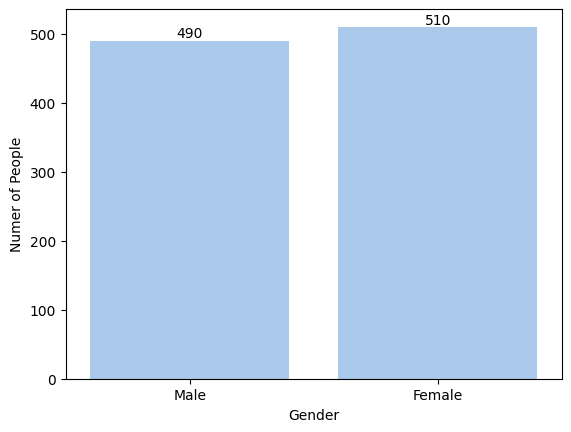

In [30]:
# plotting a bar chart for Gender and it's count

ax = sns.countplot(x = 'Gender',data = df)
# seaborn countplot: using a plot that will show the count. passing which value will be on x-axis and from where to read the data.

for bars in ax.containers:
    ax.bar_label(bars)
# containers contains the unique values in mentioned Column. iterating the values to display their count over bars in plot.

# Label the x and y axes
ax.set_xlabel('Gender')
ax.set_ylabel('Numer of People')

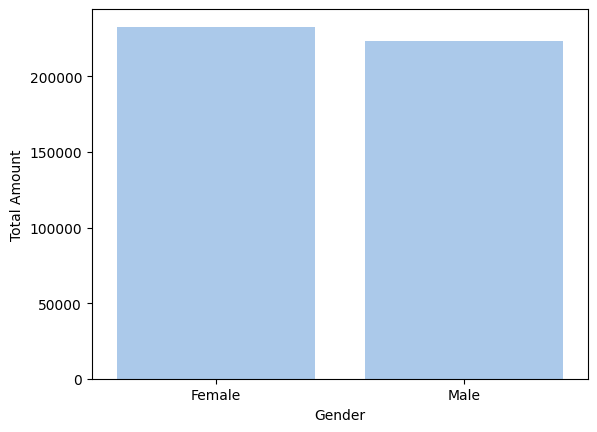

In [36]:
# plotting a bar chart for gender vs total amount

# dataframe groupby: similar concept as in SQL. 
# grouping by Gender means values in gender will be unique and 2nd column is its data against the values.
sales_gen = df.groupby(['Gender'], as_index=False)['Total Amount'].sum().sort_values(by='Total Amount', ascending=False)

# seaborn barplot: plot a bar graph. mention x and y data and data source.
ax = sns.barplot(x = 'Gender',y= 'Total Amount' ,data = sales_gen)

# Summary
*From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men*

### Age

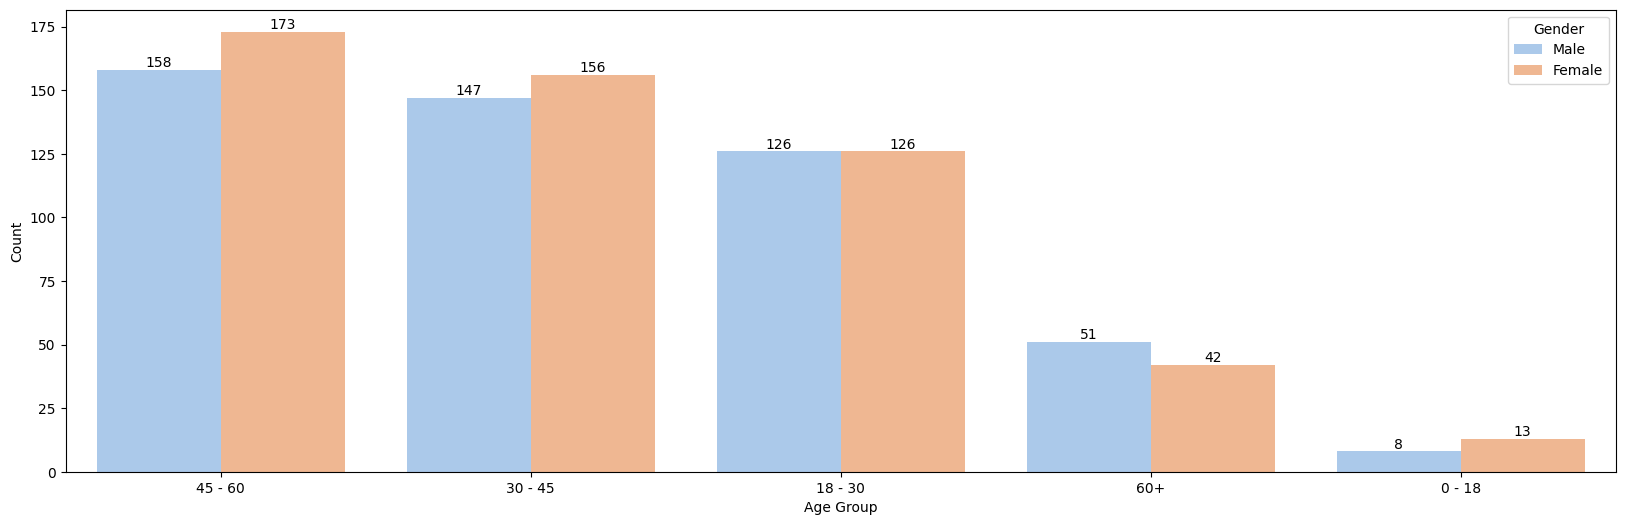

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the order of categories based on the count
order = df['Age_Group'].value_counts().index

# Set the figure size
plt.figure(figsize=(20, 6))

# Create the countplot with hue
ax = sns.countplot(x='Age_Group', hue='Gender', data=df, order=order)

# Add labels to the bars
for bars in ax.containers:
    ax.bar_label(bars)

# Set x-axis label
ax.set_xlabel('Age Group')

# Set y-axis label
ax.set_ylabel('Count')

# Show the plot
plt.show()


In [63]:
# Total Amount vs Age Group
sales_age = df.groupby(['Age_Group'], as_index=False)['Total Amount'].sum()
sales_age = sales_age.sort_values(by = ['Total Amount', 'Age_Group'], ascending = True)

sns.barplot(x = 'Age_Group', y= 'Amount', data = sales_age)

ValueError: Could not interpret value `Amount` for `y`. An entry with this name does not appear in `data`.

In [62]:
## same chart as above. Using additional hue on Gender column.

# Group the data by 'Age Group' and calculate the sum of 'Amount' for each group
sales_age = df.groupby(['Age Group', 'Gender'], as_index=False)['Amount'].sum()

# Sort the data to display in a particular order (if needed)
sales_age = sales_age.sort_values(by=[ 'Amount', 'Age Group', 'Gender'], ascending = True)

# Create the barplot with 'Age Group' on the x-axis and 'Amount' on the y-axis, using 'Gender' as hue
sns.barplot(x='Age Group', y='Amount', hue='Gender', data=sales_age)

KeyError: 'Age Group'

*From above graphs we can see that most of the buyers are of age group between 26-35 yrs female*

### State

In [ ]:
# total number of orders from top 10 states

''' In the context of a groupby operation in pandas, the as_index parameter is used to specify 
whether the grouping columns should become the index of the resulting DataFrame or not '''

sales_state = df.groupby(['State'], as_index=False)['Orders'].sum()
sales_state = sales_state.sort_values(by='Orders', ascending=False).head(10)

# set the width of graph. rc is run time parameter.
sns.set(rc={'figure.figsize':(15,5)})

sns.barplot(x = 'State',y= 'Orders', data = sales_state)

In [ ]:
# total amount/sales from top 10 states

sales_state = df.groupby(['State'], as_index=False)['Amount'].sum()
sales_state = sales_state.sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Amount')

*From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively*


### Marital Status

In [ ]:
ax = sns.countplot(data = df, x = 'Marital_Status')

sns.set(rc={'figure.figsize':(7,5)})

for bars in ax.containers:
    ax.bar_label(bars)

In [ ]:
sales_state = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data = sales_state, x = 'Marital_Status',y= 'Amount', hue='Gender')

*From above graphs we can see that most of the buyers are married (women) and they have high purchasing power*

### Occupation

In [ ]:

ax = sns.countplot(data = df, x = 'Occupation')

sns.set(rc={'figure.figsize':(20,5)})

for bars in ax.containers:
    ax.bar_label(bars)

In [ ]:
##show top 5 sectors only.

# Count the occurrences of each category in the 'Occupation' column
occupation_counts = df['Occupation'].value_counts()

# Sort the occupations by count and select the top 5
top_occupations = occupation_counts.head(5).index

# Filter the DataFrame to include only the top 5 occupations
df_top_occupations = df[df['Occupation'].isin(top_occupations)]

# Set the figure size
sns.set(rc={'figure.figsize': (20, 5)})

# Create the countplot with the filtered data
ax = sns.countplot(data=df_top_occupations, x='Occupation', order=top_occupations)

# Annotate the bars with their counts
for bars in ax.containers:
    ax.bar_label(bars)

plt.show()


In [ ]:
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Occupation',y= 'Amount')

*From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector*

### Product Category

In [ ]:
## count of Product Category orders.

sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Product_Category')

for bars in ax.containers:
    ax.bar_label(bars)

In [ ]:
## ## count of Product Category VS Amount.

sales_state = df.groupby(['Product_Category'], as_index=False)['Amount']
sales_state = sales_state.sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_Category',y= 'Amount')

*From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category*

In [ ]:
## Product ID vs No. of Orders

sales_state = df.groupby(['Product_ID'], as_index=False)['Orders'].sum()
sales_state = sales_state.sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_ID',y= 'Orders')

In [ ]:
# top 10 most sold products (same thing as above)

fig1, ax1 = plt.subplots(figsize=(15,5))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

## Conclusion:

### 

*Married women age group 26-35 yrs from UP,  Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category*

complete project on YouTube: https://www.youtube.com/@RishabhMishraOfficial
    
complete project on GitHub: https://github.com/rishabhnmishra/Python_Diwali_Sales_Analysis

Thank you!

![](learnings.png)

<img src="learnings.png" alt="Alt Text" width="700px" height="height">